# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [30]:
# Import pandas nump matplotlib statsmodels and scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [31]:
# import c4_epa_air_quality.csv
df = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [32]:
# First 10 rows of the data
print(df.head(10))

   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   
5           5  2018-01-01        Hawaii      Honolulu  Not in a city   
6           6  2018-01-01        Hawaii      Honolulu  Not in a city   
7           7  2018-01-01  Pennsylvania          Erie           Erie   
8           8  2018-01-01        Hawaii      Honolulu       Honolulu   
9           9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon 

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [33]:
# Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.
print(df.describe(include='all'))


        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: The mean value is 9.7

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A:

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [34]:
population_mean = df['aqi'].mean()
print("Population Mean:", population_mean) 


Population Mean: 6.757692307692308


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [35]:
sampled_data = df.sample(n=50, replace=True, random_state=42)


### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [36]:
# Code Here
print(sampled_data.head(10))

     Unnamed: 0  date_local      state_name    county_name   city_name  \
102         102  2018-01-01           Texas         Harris     Houston   
106         106  2018-01-01      California       Imperial    Calexico   
71           71  2018-01-01         Alabama      Jefferson  Birmingham   
188         188  2018-01-01         Arizona       Maricopa       Tempe   
20           20  2018-01-01        Virginia        Roanoke      Vinton   
102         102  2018-01-01           Texas         Harris     Houston   
121         121  2018-01-01  North Carolina    Mecklenburg   Charlotte   
214         214  2018-01-01         Florida        Broward       Davie   
87           87  2018-01-01      California       Humboldt      Eureka   
99           99  2018-01-01      California  Santa Barbara      Goleta   

                   local_site_name   parameter_name   units_of_measure  \
102                        Clinton  Carbon monoxide  Parts per million   
106          Calexico-Ethel Street  C

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: Because there is sampling with replacement.

**Question:** What does `random_state` do?

A: Random state picks different samples every time

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [37]:
# Code Here
sampled_mean = sampled_data['aqi'].mean()
print("Sampled Mean:", sampled_mean)

Sampled Mean: 5.54


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: Because we have a small sample size.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [38]:
# Create an empty list and assign it to a variable called `estimate_list`. 
# Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
# In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
# Use the list `append()` function to add the value of the sample `mean` to each item in the list.
estimate_list = []
for i in range(10000):
    sample = df['aqi'].sample(n=50, replace=True)
    estimate_list.append(sample.mean())
    



### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [39]:
# Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.
estimate_df = pd.DataFrame(estimate_list, columns=['sample_mean'])


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [40]:
# Code Here
means_sample_means = estimate_df.mean()


**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [41]:
# Code Here
print("Mean of Sampled Means:", means_sample_means)

Mean of Sampled Means: sample_mean    6.741034
dtype: float64


**Question:** How are the central limit theorem and random sampling (with replacement) related?

A: Instead of increasing the number of samples we have, we can create infinite *samples* by pulling from a sample set with replacement.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

(array([   9.,   20.,   55.,  145.,  258.,  373.,  558.,  769.,  873.,
        1031.,  989.,  997.,  906.,  733.,  637.,  511.,  345.,  273.,
         182.,  127.,   89.,   36.,   42.,   19.,    8.,    4.,    3.,
           2.,    3.,    3.]),
 array([ 3.92      ,  4.17266667,  4.42533333,  4.678     ,  4.93066667,
         5.18333333,  5.436     ,  5.68866667,  5.94133333,  6.194     ,
         6.44666667,  6.69933333,  6.952     ,  7.20466667,  7.45733333,
         7.71      ,  7.96266667,  8.21533333,  8.468     ,  8.72066667,
         8.97333333,  9.226     ,  9.47866667,  9.73133333,  9.984     ,
        10.23666667, 10.48933333, 10.742     , 10.99466667, 11.24733333,
        11.5       ]),
 <BarContainer object of 30 artists>)

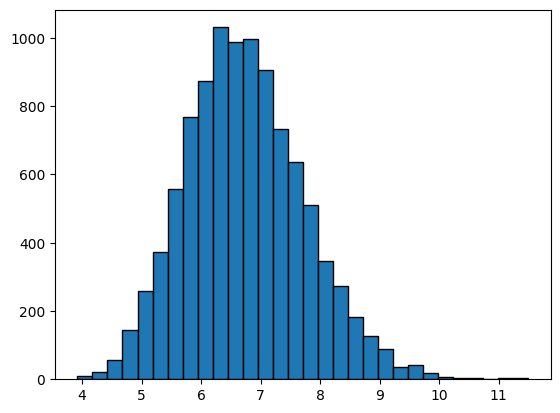

In [42]:
# Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.
plt.hist(estimate_df['sample_mean'], bins=30, edgecolor='black')

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [43]:
# Calculate the standard error of the mean AQI using the original df.
population_std = df['aqi'].std()
print("Population Standard Deviation:", population_std)


Population Standard Deviation: 7.061706678820724


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

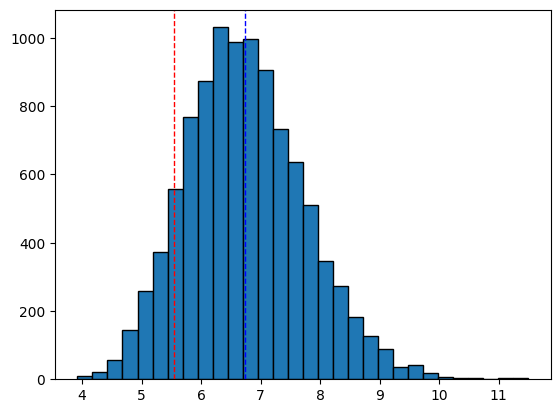

In [44]:
# Plot a histogram of the 10,000 sample means 
plt.hist(estimate_df['sample_mean'], bins=30, edgecolor='black')
# Add a vertical line indicating the mean of the first single sample of 50

# Add another vertical line indicating the mean of the means of the 10,000 samples 
# Add a third vertical line indicating the mean of the actual population
plt.axvline(sampled_mean, color='red', linestyle='dashed', linewidth=1, label='Sample Mean')
plt.axvline(means_sample_means.mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean of Sample Means')


**Question:** What insights did you gain from the preceding sampling distribution?

A: When we use sampling we get a much better estimate of the population mean.

# Considerations

**What are some key takeaways that you learned from this project?**

A: If I do not have a large sample size it is important to use sampling with replacement to get a better estimate.

**What findings would you share with others?**

A: Always try to get as large a dataset as possible.

**What would you convey to external readers?**

A: Sampling is extremely important and it must not be ignored as an option for optimizing estimation.